In [1]:
import lecilab_behavior_analysis.utils as utils
import lecilab_behavior_analysis.df_transforms as dft
import lecilab_behavior_analysis.plots as plots
from pathlib import Path
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
tv_projects = utils.get_server_projects()
animals = utils.get_animals_in_project(tv_projects[1])
animals_to_remove = ['test', 'test2']
animals = [animal for animal in animals if animal not in animals_to_remove]
# retrieve the data for the remaining animals
for mouse in animals:
    local_path = Path(utils.get_outpath()) / Path(tv_projects[1]) / Path("sessions") / Path(mouse)
    # create the directory if it doesn't exist
    local_path.mkdir(parents=True, exist_ok=True)
    # download the session data
    utils.rsync_session_data(
        project_name=tv_projects[1],
        animal=mouse,
        local_path=str(local_path),
        credentials=utils.get_idibaps_cluster_credentials(),
    )

df_list = []
for mouse in animals:
    local_path = Path(utils.get_outpath()) / Path(tv_projects[1]) / Path("sessions") / Path(mouse)
    df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")
    df_list.append(df)
    print(f"Loaded data for {mouse}.")
# concatenate the dataframes
df = pd.concat(df_list, ignore_index=True)

receiving incremental file list
ACV001.csv

sent 43,730 bytes  received 519,341 bytes  125,126.89 bytes/sec
total size is 41,767,704  speedup is 74.18
receiving incremental file list
ACV002.csv

sent 43,289 bytes  received 515,869 bytes  159,759.43 bytes/sec
total size is 40,923,400  speedup is 73.19
receiving incremental file list
ACV003.csv

sent 45,921 bytes  received 507,010 bytes  100,532.91 bytes/sec
total size is 45,812,012  speedup is 82.85
receiving incremental file list
ACV004.csv

sent 31,957 bytes  received 332,238 bytes  80,932.22 bytes/sec
total size is 29,953,369  speedup is 82.25
receiving incremental file list
ACV005.csv

sent 32,359 bytes  received 339,470 bytes  106,236.86 bytes/sec
total size is 31,041,028  speedup is 83.48
receiving incremental file list
ACV006.csv

sent 42,890 bytes  received 453,442 bytes  110,296.00 bytes/sec
total size is 40,025,611  speedup is 80.64
receiving incremental file list
ACV007.csv

sent 34,669 bytes  received 289,806 bytes  72,105.5

/tmp/ipykernel_553375/3884949693.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV001.


/tmp/ipykernel_553375/3884949693.py:21: DtypeWarning: Columns (13,14,27,28,29,30,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV002.


/tmp/ipykernel_553375/3884949693.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV003.


/tmp/ipykernel_553375/3884949693.py:21: DtypeWarning: Columns (13,14,27,28,29,30,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV004.


/tmp/ipykernel_553375/3884949693.py:21: DtypeWarning: Columns (13,14,27,28,29,30,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV005.


/tmp/ipykernel_553375/3884949693.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV006.


/tmp/ipykernel_553375/3884949693.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV007.


/tmp/ipykernel_553375/3884949693.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV008.


/tmp/ipykernel_553375/3884949693.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV009.


/tmp/ipykernel_553375/3884949693.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV010.


In [3]:
# select only the visual hard sessions
df = df[df.current_training_stage == 'TwoAFC_visual_hard']

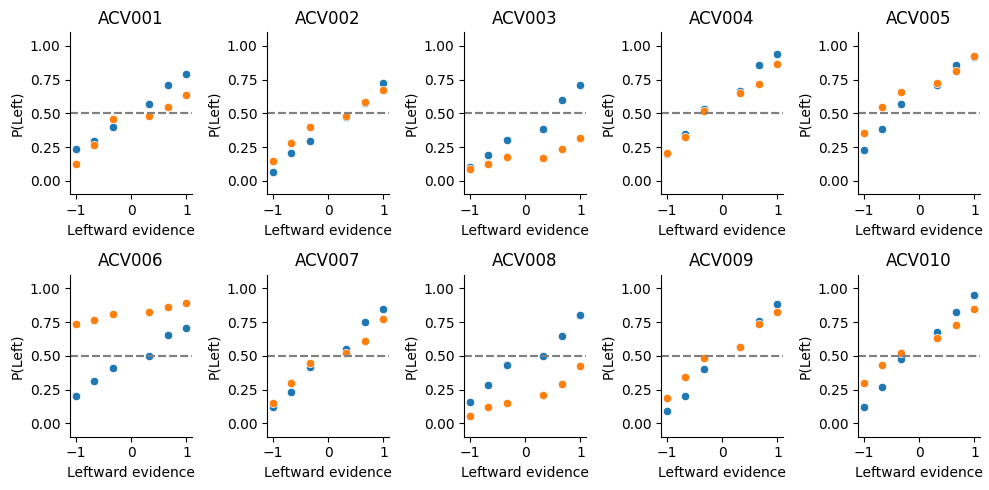

In [4]:
# date of turning on the leds
led_on_date = pd.to_datetime('2025-05-28 12:10:00')

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

bef_df = df[df.date < led_on_date]
aft_df = df[df.date >= led_on_date]

# make a figure for each subject
nrows = 2
ncols = 5
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 5))
for mouse, ax in zip(animals, axs.ravel()):
    # plot before the switch
    mouse_df = bef_df[bef_df.subject == mouse]
    psych_df = dft.get_performance_by_difficulty(mouse_df)
    ax = plots.psychometric_plot(psych_df, ax=ax)
    # plot after the switch
    mouse_df = aft_df[aft_df.subject == mouse]
    psych_df = dft.get_performance_by_difficulty(mouse_df)
    ax = plots.psychometric_plot(psych_df, ax=ax)
    ax.set_title(mouse)

plt.tight_layout()
plt.show()